In [15]:
import numpy as np
import tifffile
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

In [16]:
# 设置TIFF图片的路径
tiff_main_folder = 'C:\\Users\\Soyo\\OneDrive\\LABDATA\\3.25 laser fluctuation with qCMOS\\qCMOS'
tiff_filenames = [f for f in os.listdir(tiff_main_folder) if f.lower().endswith(('.tif', '.tiff'))]

# 初始化一个空的列表来存储图片数组
image_list = []

# 读取每张图片并添加到列表中
for index, filename in enumerate(tiff_filenames):
    if index >= 50:  # 如果只想处理前50张图片
        break
    image_path = os.path.join(tiff_main_folder, filename)
    image = tifffile.imread(image_path)
    image_list.append(image)

# 将列表转换为一个NumPy数组
images_array = np.array(image_list)

# 确认数组的形状
print(images_array.shape)  # 应该输出 (50, 4096, 2304)

(50, 2304, 4096)


In [17]:
imgarray_1 = images_array[0]

In [18]:
# 使用切片选择中间一部分像素点
selected_region = images_array[:, 0:2305, 0:4097]


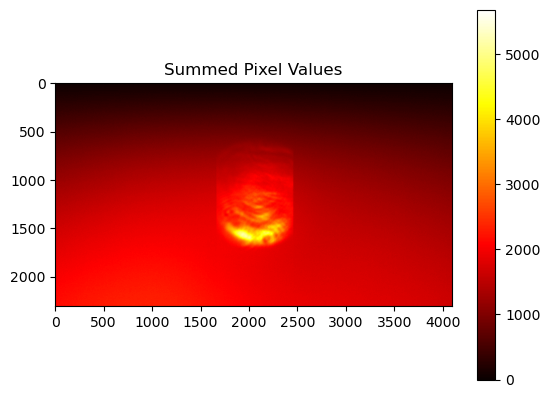

In [19]:
# 计算每个像素点在所有图像中的总和
summed_image = np.sum(selected_region, axis=0)

# 绘制结果图像
plt.imshow(summed_image, cmap='hot')  # 使用灰度色图
plt.colorbar()  # 显示颜色条
plt.title('Summed Pixel Values')
#plt.xlim(1500,2500)
plt.show()

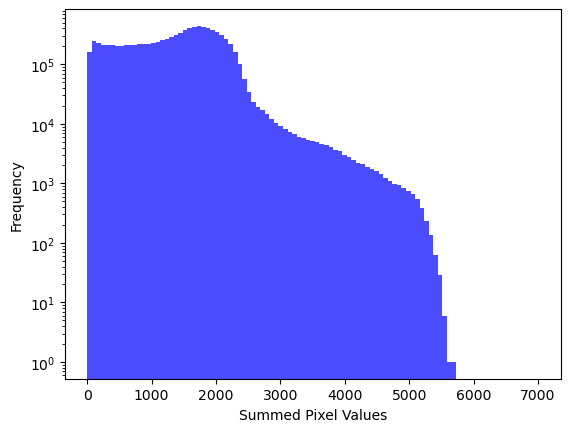

In [20]:
# 绘制RMS值的直方图
bins = np.linspace(0,7000,100)
plt.hist(summed_image.ravel(), bins, color='blue', alpha=0.7)
#plt.title('Histogram of Summed Pixel Values')
plt.xlabel('Summed Pixel Values')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

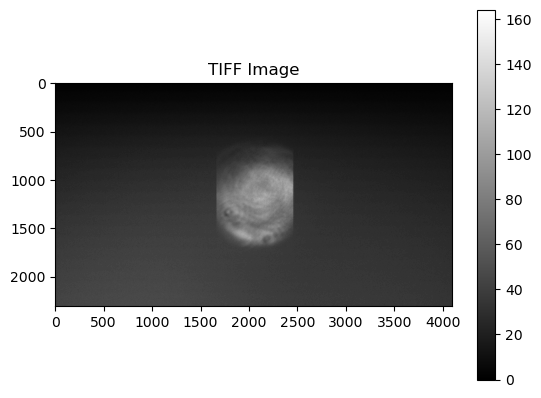

In [21]:
plt.imshow(images_array[3], cmap='gray')  # 使用灰度色图
plt.colorbar()  # 显示颜色条
plt.title('TIFF Image')
plt.show()

In [22]:
# 计算每个像素点的RMS值
rms_values = np.sqrt(np.mean(np.square(selected_region), axis=0))

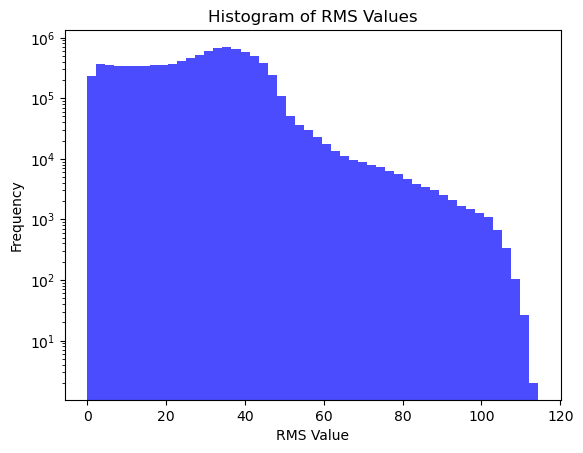

In [23]:
# 绘制RMS值的直方图
plt.hist(rms_values.ravel(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of RMS Values')
plt.xlabel('RMS Value')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

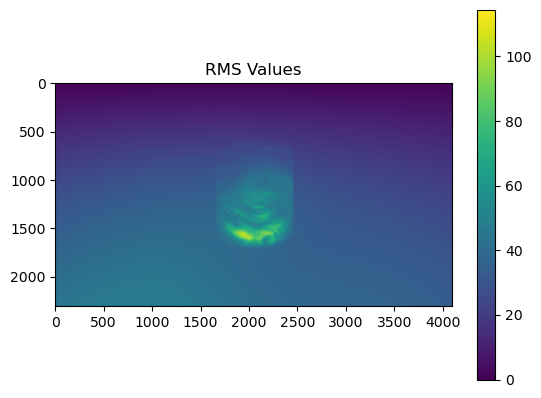

In [24]:
# 绘制RMS值的2D图像
plt.imshow(rms_values, cmap='viridis')  # 使用viridis色图
plt.colorbar()  # 显示颜色条
plt.title('RMS Values')
plt.show()


In [25]:
print(rms_values[1500, 1800])

72.44459952266973
